In [1]:
import requests
import pymongo

header = {"Secret-Key": "H2jk9uKnhRmL6WPwh89zBezWvr"}
response = requests.get("https://www.pexels.com/zh-cn/api/v3/search/photos?page=1&per_page=3000&query=女孩&orientation=all&size=all&color=all&seo_tags=true",
                        headers=header)
data = response.json()["data"]


res = []
for each in data:
    line = {
        "title": each["attributes"]["alt"], 
        "url": each["attributes"]["image"]["download_link"],
        "tags": [i["name"] for i in each['attributes']['tags']],
    }
    res.append(line)

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["photoshop"]
collection = db["pexel_photo"]

# Sample data: list of dictionaries representing multiple documents

# Insert multiple documents into the collection
result = collection.insert_many(res)

# Print the inserted document IDs
print("Inserted IDs:", result.inserted_ids)



Inserted IDs: [ObjectId('64cb714d8c5be9ff8a52086c'), ObjectId('64cb714d8c5be9ff8a52086d'), ObjectId('64cb714d8c5be9ff8a52086e'), ObjectId('64cb714d8c5be9ff8a52086f'), ObjectId('64cb714d8c5be9ff8a520870'), ObjectId('64cb714d8c5be9ff8a520871'), ObjectId('64cb714d8c5be9ff8a520872'), ObjectId('64cb714d8c5be9ff8a520873'), ObjectId('64cb714d8c5be9ff8a520874'), ObjectId('64cb714d8c5be9ff8a520875'), ObjectId('64cb714d8c5be9ff8a520876'), ObjectId('64cb714d8c5be9ff8a520877'), ObjectId('64cb714d8c5be9ff8a520878'), ObjectId('64cb714d8c5be9ff8a520879'), ObjectId('64cb714d8c5be9ff8a52087a'), ObjectId('64cb714d8c5be9ff8a52087b'), ObjectId('64cb714d8c5be9ff8a52087c'), ObjectId('64cb714d8c5be9ff8a52087d'), ObjectId('64cb714d8c5be9ff8a52087e'), ObjectId('64cb714d8c5be9ff8a52087f'), ObjectId('64cb714d8c5be9ff8a520880'), ObjectId('64cb714d8c5be9ff8a520881'), ObjectId('64cb714d8c5be9ff8a520882'), ObjectId('64cb714d8c5be9ff8a520883'), ObjectId('64cb714d8c5be9ff8a520884'), ObjectId('64cb714d8c5be9ff8a520885'

In [43]:
res = collection.find({})
tags = set(sum([i["tags"] for i in res], []))

In [45]:
len(tags)

4986

In [47]:
import requests
query = "女孩"
requests.get("http://localhost:8000/v1/search", params={"query": query}).json()

['https://images.pexels.com/photos/4998009/pexels-photo-4998009.jpeg?cs=srgb&dl=pexels-rachel-claire-4998009.jpg&fm=jpg',
 'https://images.pexels.com/photos/2330169/pexels-photo-2330169.jpeg?cs=srgb&dl=pexels-bruno-salvadori-2330169.jpg&fm=jpg',
 'https://images.pexels.com/photos/10677607/pexels-photo-10677607.jpeg?cs=srgb&dl=pexels-ron-lach-10677607.jpg&fm=jpg',
 'https://images.pexels.com/photos/10910449/pexels-photo-10910449.jpeg?cs=srgb&dl=pexels-%D0%B3%D0%B0%D0%BB%D0%B8%D0%BD%D0%B0-%D0%BB%D0%B0%D1%81%D0%B0%D0%B5%D0%B2%D0%B0-10910449.jpg&fm=jpg',
 'https://images.pexels.com/photos/4056509/pexels-photo-4056509.jpeg?cs=srgb&dl=pexels-cottonbro-studio-4056509.jpg&fm=jpg',
 'https://images.pexels.com/photos/3932961/pexels-photo-3932961.jpeg?cs=srgb&dl=pexels-tatiana-syrikova-3932961.jpg&fm=jpg']

In [48]:
from utils import roop

In [75]:
from PIL import Image
import numpy as np


img = np.array(Image.open("test.jpg"))

In [96]:
x,y,w,h = roop.get_face_single(img,4).bbox

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

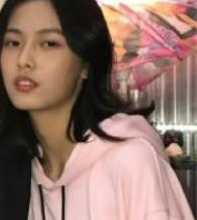

In [97]:
Image.fromarray(img[int(y):int(y+h), int(x):int(x+w)])

In [99]:
import insightface
fa = insightface.app.FaceAnalysis(name="buffalo_l")
fa.prepare(ctx_id=0, det_size=(640,640))
face = fa.get(img)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/vampired/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

/home/vampired/miniconda3/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [104]:
[i["bbox"] for i in face]

[array([223.5107 , 111.20587, 303.07382, 220.26839], dtype=float32),
 array([107.46401,  41.46516, 195.95428, 152.2939 ], dtype=float32),
 array([  3.5827975, 126.819496 ,  15.274002 , 142.04863  ], dtype=float32),
 array([ 79.77933 , 124.532196,  92.82872 , 140.36354 ], dtype=float32),
 array([ 46.768528, 143.37021 ,  61.62581 , 162.79977 ], dtype=float32),
 array([274.64374 ,  16.486406, 290.2923  ,  33.772133], dtype=float32)]